In [13]:
#import stuff

import numpy as np
from CreateDataFunctions import *
import sklearn.decomposition as dec
import matplotlib.pyplot as plt

In [14]:
#import data

nrObservations = 1000
nrFeatures = 200
seed = 30
nrDimToKeep = 30

normalData = normal_data(nrObservations, nrFeatures, seed)
uniformData = uniform_data(nrObservations, nrFeatures, seed)
normalDataCov = normal_data_with_cov(nrObservations, nrFeatures, seed)

datasets_original = [normalData, uniformData, normalDataCov]

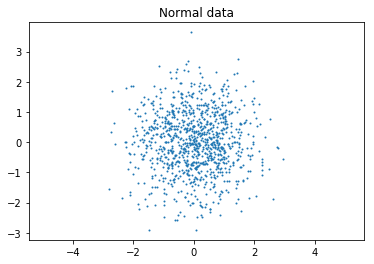

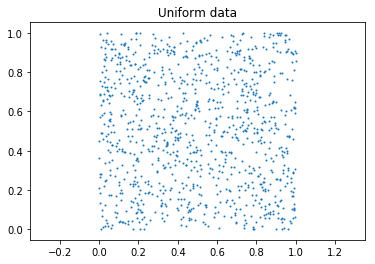

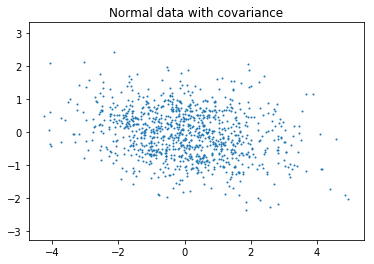

In [76]:
# plot data

#normal
plt.scatter(normalData[:,0],normalData[:,1],s=1)
plt.title('Normal data')
plt.axis('equal')
plt.show()

#uniform
plt.scatter(uniformData[:,0],uniformData[:,1],s=1)
plt.title('Uniform data')
plt.axis('equal')
plt.show()

#normal with cov
plt.scatter(normalDataCov[:,0],normalDataCov[:,1],s=1)
plt.title('Normal data with covariance')
plt.axis('equal')
plt.show()

In [81]:
# create pca and isomap data sets

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

nrFeaturesKeep = 10
datasets_PCA = []
datasets_ISO = []
for i,X in enumerate(datasets_original):
    pca = PCA(nrFeaturesKeep)
    pca = pca.fit(X)

    isomap = Isomap(n_components=nrFeaturesKeep)
    isomap = isomap.fit(X)

    datasets_PCA.append(pca.transform(X))
    datasets_ISO.append(isomap.transform(X))

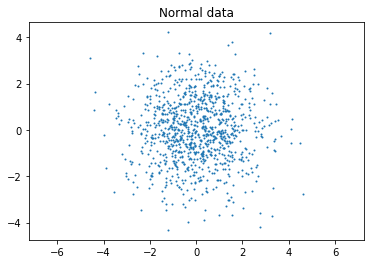

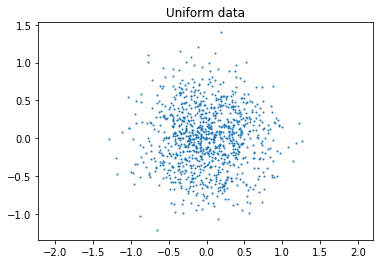

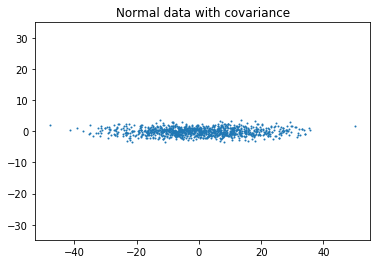

In [82]:
# plot data normal

#normal
plt.scatter(datasets_PCA[0][:,0],datasets_PCA[0][:,1],s=1)
plt.title('Normal data')
plt.axis('equal')
plt.show()

#uniform
plt.scatter(datasets_PCA[1][:,0],datasets_PCA[1][:,1],s=1)
plt.title('Uniform data')
plt.axis('equal')
plt.show()

#normal with cov
plt.scatter(datasets_PCA[2][:,0],datasets_PCA[2][:,1],s=1)
plt.title('Normal data with covariance')
plt.axis('equal')
plt.show()

In [24]:
import numpy as np
from sklearn.cluster import KMeans

#def k maeans
def Kmeans(X,k=K):
    # Clusters data into k clusters, where k can be a vector of different integers, 
    # in which case clustering is made for each k.
    if isinstance(k, int):
        kmeans = KMeans(n_clusters=k).fit(X)
        return kmeans.labels_

    labels = np.zeros([X.shape[0],len(k)])

    for i in range(len(k)):
        kmeans = KMeans(n_clusters=k[i]).fit(X)
        labels[:,i] = kmeans.labels_

    return labels


#run k means on data set
K = 5
labels_PCA = []
labels_ISO = []
labels_original = []
for X in datasets_original:
    labels_original.append(Kmeans(X, k=K))
for X in datasets_PCA:
    labels_PCA.append(Kmeans(X, k=K))
for X in datasets_ISO:
    labels_ISO.append(Kmeans(X, k=K))

In [28]:
import numpy as np
from sklearn.cluster import KMeans

#def k maeans
def Kmeans(X,k=K):
    # Clusters data into k clusters, where k can be a vector of different integers, 
    # in which case clustering is made for each k.
    if isinstance(k, int):
        kmeans = KMeans(n_clusters=k).fit(X)
        return kmeans.labels_

    labels = np.zeros([X.shape[0],len(k)])

    for i in range(len(k)):
        kmeans = KMeans(n_clusters=k[i]).fit(X)
        labels[:,i] = kmeans.labels_

    return labels


#run k means on data set
labels_PCA_varyingK = []
labels_ISO_varyingK = []
labels_original_varyingK = []
k_vec = [1,2,3,4,5]

for K in k_vec: 
    labels_PCA = []
    labels_ISO = []
    labels_original = []
    for X in datasets_original:
        labels_original.append(Kmeans(X, k=K))
    for X in datasets_PCA:
        labels_PCA.append(Kmeans(X, k=K))
    for X in datasets_ISO:
        labels_ISO.append(Kmeans(X, k=K))
    labels_PCA_varyingK.append(labels_PCA)
    labels_ISO_varyingK.append(labels_ISO)
    labels_original_varyingK.append(labels_original)
    